In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

Lets Plot this function. Its mostly a parabolic function. x = -5 to 5 with steps of 0.25

In [4]:
xs = np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

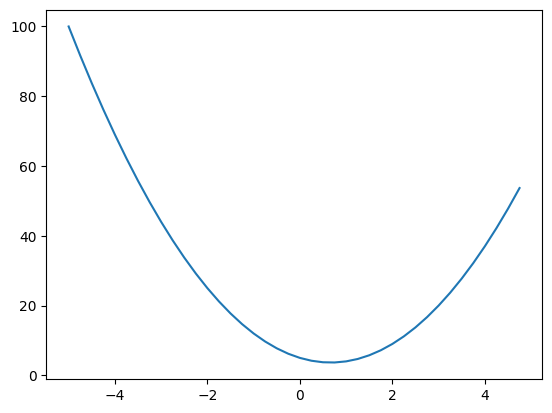

In [6]:
plt.plot(xs,ys)

What is the derivate of this function at every input point x.
$$
f'(x) = \lim_{{h \to 0}} \frac{{f(x + h) - f(x)}}{h} 
$$


where you slighly bump-up x (input) by very small amount(h->0), how does the function response. or whats the rate of change. (slope of response.) whether it goes up or down

In [7]:
h=0.00001
x=3.0
f(x) ,f(x+h), (f(x+h)-f(x))/h

(20.0, 20.0001400003, 14.00003000000538)

In [8]:
h=0.00001
x=-2.0
f(x) ,f(x+h), (f(x+h)-f(x))/h

(25.0, 24.999840000299997, -15.999970000279971)

In [9]:
h = 0.000001
x = 2/3
f(x) ,f(x+h), (f(x+h)-f(x))/h

(3.666666666666667, 3.6666666666696663, 2.999378523327323e-06)

Slope is 0 at x=2/3

In [10]:
# Lets get more complex
# inputs
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
d

4.0

Lets calculate the derivate of d wrt a,b and c.
we can keep b,c constant and change a



In [11]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


so if we increase a, the value of function goes down. hence slope (or derivate) is negative. since b is multiply (its value is 3), intuitiavvely we can tell that derivatite will be be -3

Lets increase c, since c is additive, the effect should be always one (linear in this case).

In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [13]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


Some building blocks. lets create a Value Object and the above expression can be supported by the value object. Also we can create a expression DAG using value object

In [14]:
class Value:
    def __init__(self,data,_children=(),_op='', label='') -> None:
        self.data=data
        self._children=set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data+other.data,(self,other),_op='+')
    
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),_op='*')
    
a=Value(2.0)
print(Value(2.0)*Value(-3.0)+Value(10))
print(Value(2.0).__mul__(Value(-3.0)).__add__(Value(10)))

Value(data=4.0)
Value(data=4.0)


Since we want to maintain relationship of what values are derived from which value, we can maintain the dependencies as shown below. we want maintain what values produce the current value and what are the operation performed. 

In [15]:
class Value:
    def __init__(self,data,children=(),_op='', label='') -> None:
        self.data=data
        self._prev=set(children)
        self._op=_op
        self.label=label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data+other.data,(self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),'*')
    
a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
d=a*b+c
print(d._prev)
print(d._op)


{Value(data=10.0), Value(data=-6.0)}
+


Lets visualize this graph using graphviz.

In [16]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

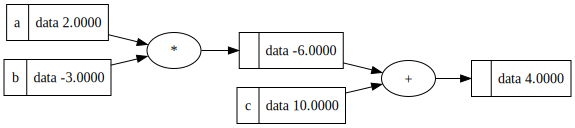

In [17]:
draw_dot(d)

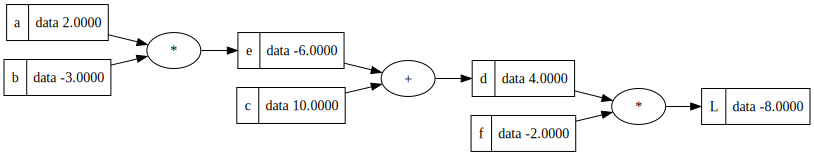

In [18]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
draw_dot(L)

Summary of what we have done : 
Able to build mathamatical equation using scalar value along the way. And we can do this **Forward Pass** and build out a mathamatical equation that produces a single value L. 
The above is visualizing the forward pass. and currenly the output of the forward pass is -8.      


* Next Goal is to do **back propagation** and calculate gradient along every single value. i.e. start from L.
* For every single Value (node), we are going to compute the derivate wrt L.

(In terms of Neural network assume L is a loss function and all the other nodes are weights. So you will calculate the derivative of all weights and biases against loss function)


Lets add derivate in each node.(called grad or gradient)

In [19]:
class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data=data
        self._prev=set(_children)
        self._op = _op
        self.label = label
        self.grad=0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data+other.data,(self,other),_op='+')
    
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),_op='*')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        return Value(t, (self, ), 'tanh')
    
        


In [20]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [21]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

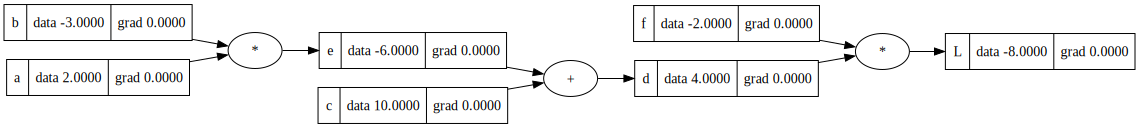

In [22]:
draw_dot(L)

Lets calculate derivate of this graph wrt L which is the output

L+h-L = 1
/h

so derivate of L wrt L is 1

lets go backward and calculate derivate of l wrt data

L=d*f

dL/dd --> change in L wrt change in d

((d+h)*f -d*f)/h
=

gradient of L wrt to D is f = -2.0

gradient of L wrt to f is d = 4

for multiplication gradient is other multiplying factor

For inner nodes which are not directly connected with L.

first calculate the local gradient

for c,
c+h+e-c+e/h --> 1

for addition gradient is always 1


for addition gradient is always pass through as you will multiply by the next node.

so gradient of e and c = -2

so going back gradient of a will be -6


In [23]:
def calc():
    
    h=0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L1 = d * f; L.label = 'L'
    # adding h to a
    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L2 = d * f; L.label = 'L'
    print ((L2.data - L1.data)/h)


calc()   


6.000000000021544


Lets do one more complex example of backpropagation. lets take example of a neuron. 
We will backpropage through the neuron. Evenetually we will build multilayer neural network. show one of the example of the neural network.
Mathematical model of the neuron. you have multiple inputs for a single neuron. Each input has a weight. The neuron also has a bias. 

Lets take example of two input x1 and x2. the output of the neuron would be 
result --> x1w1+x2w2
output --> activation_function(result)

The activation function is come kind os squashing function to squash the value  like sigmoid or relu. Lets use relu as activation function


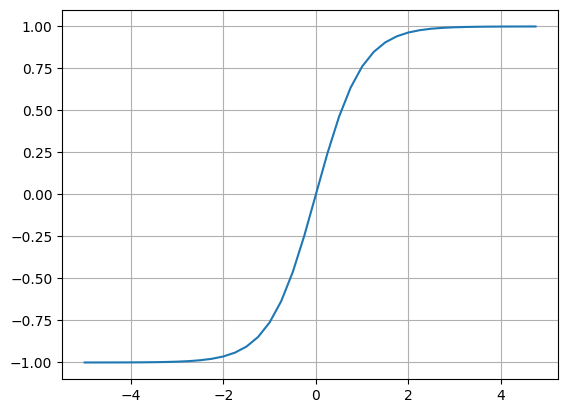

In [24]:
plt.plot(np.arange(-5,5,0.25),np.tanh(np.arange(-5,5,0.25)));
plt.grid()

In [25]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(-1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

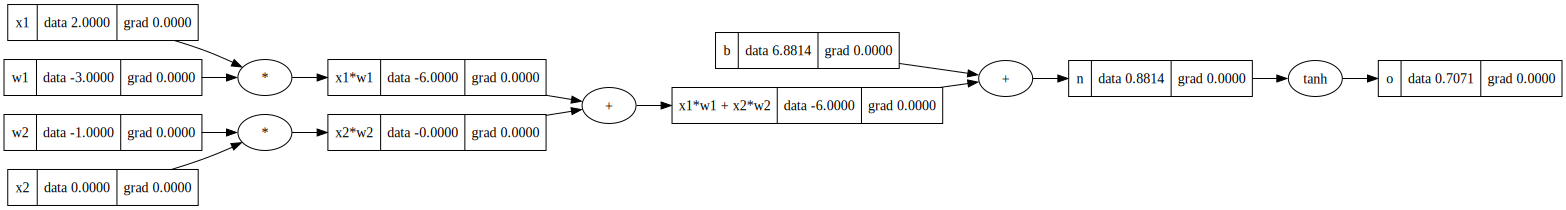

In [26]:
draw_dot(o)


Now Lets do the backpropagation manually. typically we will have to calculate the derivate of weights w1 and w2 as those will be changed while training the neural network.

In [27]:
# derivate of o wrt to o is always 1.0
o.grad=1.0
# back propogate through tanh. We need to know the local derivate of tanh Lets calculate local derivate of relu
# The gradient of tanh is 1-o**2.
n.grad=(1.0-o.data**2)*o.grad

# + operation is just a distribution of the gradient. The gradient will just flow to both node equally (because local derivate of each operation in plus is 1. so 1*0.5=0.5)

#
x1w1x2w2.grad=0.5
b.grad=0.5

# one more plus for x1*w1 and x2*w2. 0.5 will flow
x1w1.grad=0.5
x2w2.grad=0.5

# coming back to the root node. its multiplication node. so local derivate will be the value of other operation. by chain rule, we will have to multiply by 0.5
x1.grad=w1.data * x1w1.grad
w1.grad=x1.data * x1w1.grad

x2.grad=w2.data * x2w2.grad
w2.grad=x2.data * x2w2.grad

Gradient of w2 wrt the output is 0, this means the effect of w2 on the output is 0. if you increase w2, than it has no effect on the output.
Gradeint of w1 is 1, so if we want the output of neuron to increse , we should increse w1 and vice versa.

Lets implement the backpropagation

In [28]:
class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data=data
        self._prev=set(_children)
        self._op = _op
        self.label = label
        self.grad=0.0
        self._backward = lambda:None

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),_op='+')
        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward    
        return out
    
    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),_op='*')
        
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        
        out._backward = _backward        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1-t**2) * out.grad
    
        out._backward = _backward        
        return out

    def backward(self):
        self._backward()
        for node in self._prev:
            node.backward()
    
        


Lets do backpropagation by calling _backward manually

In [29]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(-1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

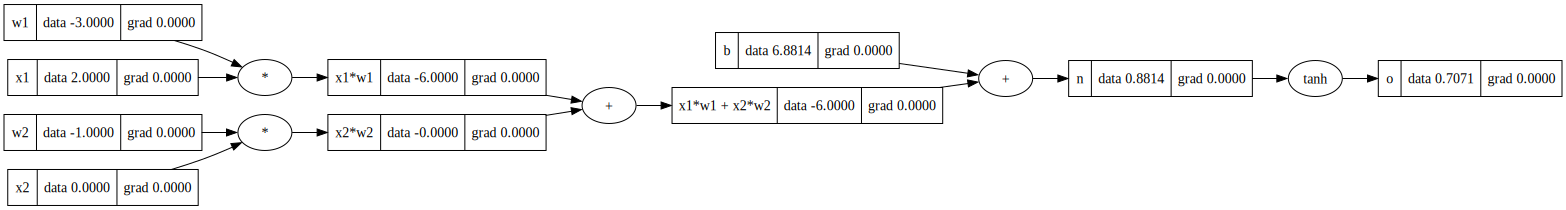

In [30]:
draw_dot(o)

In [31]:
o.grad=1




In [32]:
# o._backward()
# n._backward()
# x1w1x2w2._backward()
# x1w1._backward()
# x2w2._backward()


Now Lets automate this

In [61]:
class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data=data
        self._prev=set(_children)
        self._op = _op
        self.label = label
        self.grad=0.0
        self._backward = lambda:None

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data+other.data,(self,other),_op='+')
        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward    
        return out
    
    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data*other.data,(self,other),_op='*')
        
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        
        out._backward = _backward        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1-t**2) * out.grad
    
        out._backward = _backward        
        return out

    def backward(self):
        self._backward()
        for node in self._prev:
            node.backward()

    def __rmul__(self, other): # other * self
        return self * other
       
    def __radd__(self, other): # other + self
        return self + other
        


In [34]:
o.backward()

Lets implement this in pytorch for comparision

In [35]:
import torch


In [36]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


Lets build a neural network from scratch using the above construct and implement back propagation

1.24

Lets Build the neuron first. Ths constructor takes number of inputs for the neuron.

In [37]:
import random


In [38]:
class Neuron:
    def __init__(self,nin):
        # initialise the weights for  each input between -1 to 1
        self.w = (Value(random.uniform(-1,1)) for _ in range(nin))
        # initialise the bias
        self.b = Value(random.uniform(-1,1))
    # in Python, the __call__ function is a special method that you can define in a class to make an instance of that class callable, just like a function. 
    def __call__(self,x):
        # w*x+b
        return 0.0


In [39]:
n= Neuron(2)

n([1,2])

0.0

Lets do the forward pass on the call function

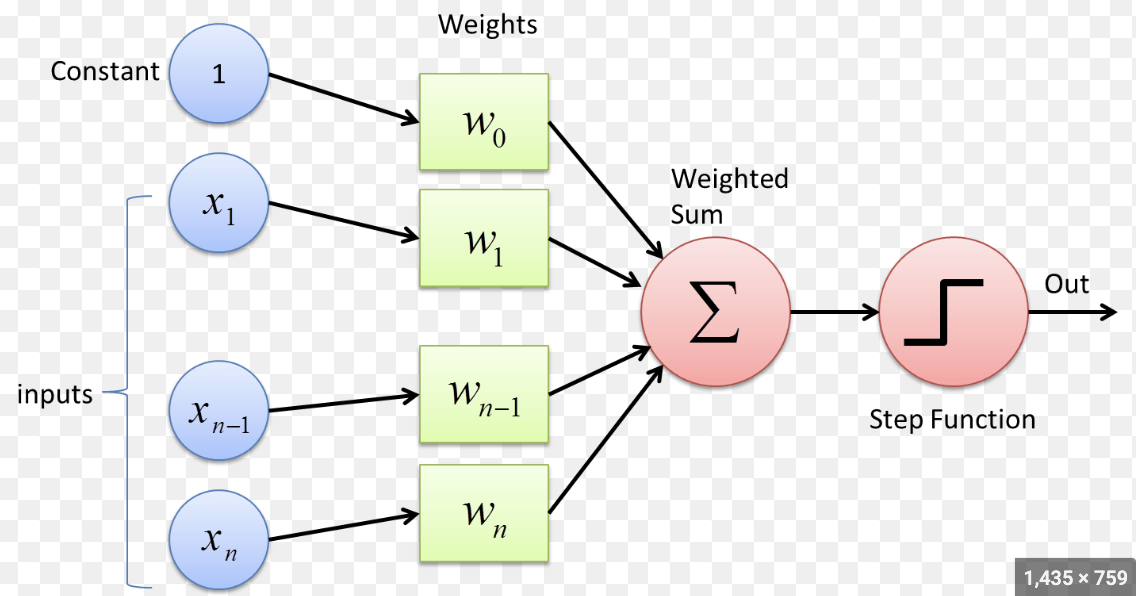

In [44]:
from IPython.display import Image
Image(filename='assets/perpceptron.png',width=500,height=300) 

In [57]:
class Neuron:
    def __init__(self,nin):
        # initialise the weights for  each input between -1 to 1
        self.w = (Value(random.uniform(-1,1)) for _ in range(nin))
        # initialise the bias
        self.b = Value(random.uniform(-1,1))
    # in Python, the __call__ function is a special method that you can define in a class to make an instance of that class callable, just like a function. 
    def __call__(self,x):
        # all the weights will be paired up with inputs
        print(list(zip(self.w,x)))
        # w*x+b
        return 0.0

n= Neuron(2)

n([1,2])

[(Value(data=-0.6456671504289249), 1), (Value(data=0.44711641639614497), 2)]


0.0

In [62]:
class Neuron:
    def __init__(self,nin):
        # initialise the weights for  each input between -1 to 1
        self.w = [ Value(random.uniform(-1,1)) for _ in range(nin) ]
        # initialise the bias
        self.b = Value(random.uniform(-1,1))
    # in Python, the __call__ function is a special method that you can define in a class to make an instance of that class callable, just like a function. 
    def __call__(self,x):
        # activation function
        act = sum(xi*wi for wi, xi in zip(self.w,x)) + self.b
        # pass through non linearity
        out=act.tanh()
        return out

n= Neuron(2)

n([2.0,3.0])

Value(data=0.9216802764484548)

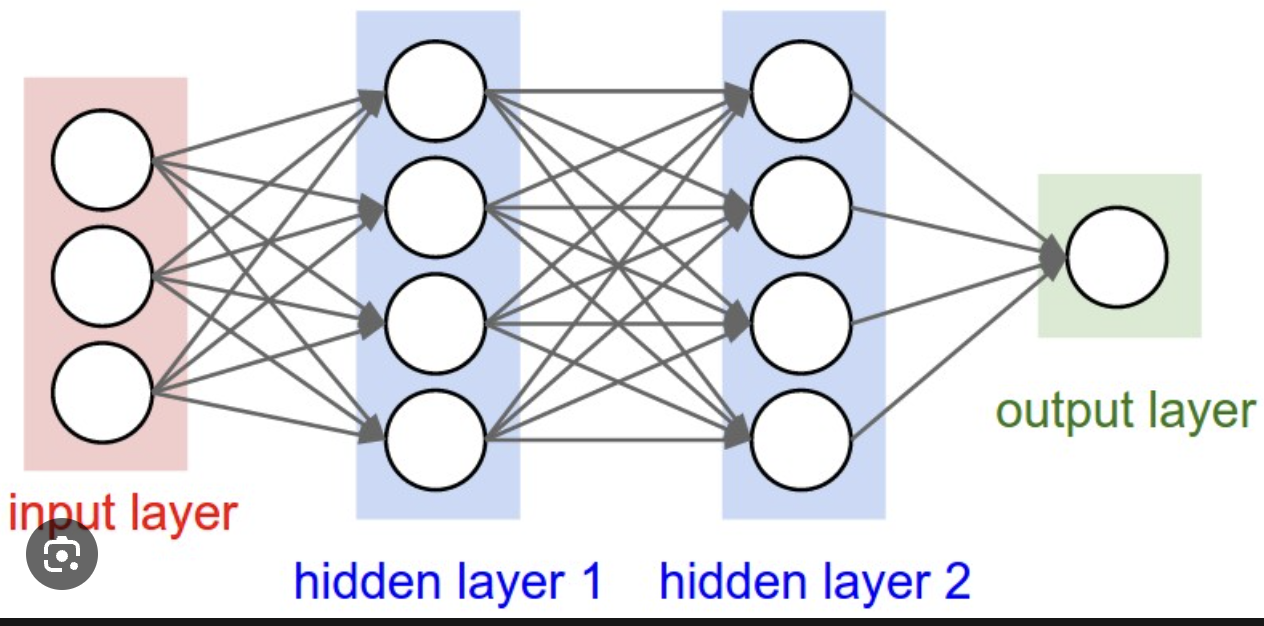

In [63]:
from IPython.display import Image
Image(filename='assets/cnn.png',width=500,height=300) 

In [74]:



class Layer:
    # nin is the number of input for the layer
    # n_neurons is the the number of neuron in the single layer
    def __init__(self,nin,n_neurons) -> None:
        self.neurons = [Neuron(nin) for _ in range(n_neurons)]
    def __call__(self, x) :
         outs = [n(x) for n in self.neurons]  
         return outs[0] if len(outs) == 1 else outs 


x=[2.0,3.0]
n=Layer(2,3)
n(x)         

[Value(data=0.9787325691027149),
 Value(data=0.9504719156841311),
 Value(data=0.9571998099850006)]

In [77]:
from typing import Any

# Lets define Multilayer Perceptron  as shown in the picture
class MLP:
    # nin is the number of input to the neural net
    # nouts is the layers which builds the ML
    def __init__(self, nin, nouts) -> None:
        size= [nin]+nouts
        #  there will be 4 layers
        numberOfLayers = len(nouts)
        self.layers = [Layer(size[i],size[i+1]) for i in range(numberOfLayers)]

    def __call__(self, x) -> Any:
        for layer in self.layers:
            x = layer(x)
        return x

inputs=[2.0, 3.0,-1.0]
layers = [4,4,1]
n = MLP(len(inputs),layers)
n(inputs)
           

Value(data=-0.10787682024678868)